# Proyek Sains Data - Multivariate Multistep

<hr>

## Prediksi Harga Saham

Nama : Riskina Salsabilla Bayzura

NIM  : 220411100015

Kelas : IF5D



# DATA UNDERSTANDING

## Requirement


In [2]:
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

# from google.colab import drive
# drive.mount('/content/drive')

## Load Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PSD/Tugas3/Data_Historis_TLKM.csv')

df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/01/2019,3.73,3.75,3.76,3.70,"31,36M","-0,53%"
1,03/01/2019,3.74,3.71,3.77,3.69,"83,84M","0,27%"
2,04/01/2019,3.71,3.69,3.74,3.69,"73,94M","-0,80%"
3,07/01/2019,3.77,3.76,3.79,3.75,"83,68M","1,62%"
4,08/01/2019,3.80,3.77,3.80,3.75,"67,96M","0,80%"
...,...,...,...,...,...,...,...
1385,18/09/2024,3.12,3.12,3.13,3.10,NaN,"0,97%"
1386,19/09/2024,3.14,3.14,3.15,3.12,NaN,"0,64%"
1387,20/09/2024,3.15,3.15,3.17,3.12,NaN,"0,32%"
1388,23/09/2024,3.17,3.15,3.18,3.13,NaN,"0,63%"


## Deskripsi Data

Berdasarkan studi kasus saya, dataset yang akan saya gunakan merupakan data historis harga saham PT Telkom Indonesia Tbk (TLKM). Data ini berisi informasi tentang harga saham TLKM dari waktu ke waktu, termasuk harga penutupan, harga pembukaan, harga tertinggi, harga terendah, volume perdagangan, dan perubahan harga dalam persentase.Setiap baris data merepresentasikan data saham pada satu hari.

Informasi penting yang terdapat pada dataset ini adalah:

* Harga: Informasi harga saham dicatat dalam beberapa aspek yaitu harga terakhir, harga pembukaan, harga tertinggi, dan harga terendah dalam satu hari. Informasi ini menunjukkan fluktuasi harga saham TLKM dalam periode waktu tersebut.
* Volume Perdagangan: Fitur 'Vol.' menunjukkan jumlah saham TLKM yang diperdagangkan pada hari itu. Volume perdagangan yang tinggi bisa mengindikasikan adanya aktivitas jual-beli yang aktif.
* Perubahan Harga: Fitur 'Perubahan %' memberikan gambaran tentang persentase perubahan harga saham TLKM pada hari itu dibandingkan dengan hari sebelumnya. Nilainya bisa positif (menunjukkan kenaikan harga) atau negatif (menunjukkan penurunan harga).
* Tanggal: Data ini menunjukkan kapan informasi harga saham tersebut direkam. Dengan informasi tanggal, saya dapat melakukan analisis berdasarkan waktu seperti tren pergerakan harga dalam periode tertentu.

**Tujuan**:

Tujuan saya menggunakan dataset ini adalah untuk melakukan prediksi harga saham TLKM di masa mendatang dengan menggunakan metode Machine Learning Long Short-Term Memory (LSTM). Dengan mempelajari pola historis dari data ini, model machine learning dapat dilatih untuk memperkirakan harga saham di hari berikutnya.

**Tantangan**:

Salah satu tantangan dalam mengolah dataset ini adalah tipe data pada fitur 'Vol.' dan 'Perubahan %' yang masih berupa 'object' dan perlu diubah ke tipe data numerik (float) sebelum digunakan untuk membuat model.

**Kesimpulan**:

Dataset ini memberikan informasi yang cukup lengkap tentang pergerakan harga saham TLKM. Dengan melakukan analisis dan pemrosesan data yang tepat, dataset ini dapat digunakan untuk membangun model prediksi harga saham yang akurat.

## Penjelasan Fitur


Dari dataset yang kami miliki terdapat beberapa attribut sebagai berikut:


1.   **Tanggal**:
      Data ini berisi tanggal saham dengan format Tanggal-Bulan-Tahun. Data ini memiliki tanggal minimum 01 Januari 2019 dan tanggal maksimum 29 September 2024. Tipe datanya adalah datetime (Nominal).


2.   **Terakhir**: Menunjukkan harga penutupan saham pada hari tersebut. Tipe datanya adalah float64 (Numerik).


3.   **Pembukaan**: Menunjukkan harga pembukaan saham pada hari tersebut. Tipe datanya adalah float64 (Numerik).


4.   **Tinggi**: Menunjukkan harga saham tertinggi yang dicapai pada hari tersebut. Tipe datanya adalah float64 (Numerik).


5.   **Rendah**: Menunjukkan harga terendah saham yang dicapai pada hari tersebut. Tipe datanya adalah float64 (Numerik).


6.   **Vol. (Volume)**: Menunjukkan volume perdagangan saham pada hari tersebut, yaitu jumlah saham yang diperdagangkan. Tipe datanya adalah obyek karena mengandung karakter non-numerik.


7.   **Perubahan %** : Menunjukkan persentase perubahan harga saham pada hari tersebut dibandingkan dengan hari sebelumnya. Tipe datanya adalah obyek karena mengandung karakter non-numerik.





## EDA

In [4]:
print(f"shape: {df.shape}")
print(f"count of rows with missing values: {len(df[df.isna().any(axis=1)])}") # 0
print(f"columns: {df.columns}")

shape: (1390, 7)
count of rows with missing values: 5
columns: Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')


Dari informasi di atas kita mendapatkan informasi mengenai beberapa hal, antara lain:

1. df.shape => menampilkan jumlah kolom dan baris dari dataset, terdapat **1390** baris dan **7** kolom.
2. Terdapat missing values sebanyak **5**
3. Isi kolomnya antara lain => Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol., Perubahan%

### Exploratory Data Analysis (EDA) secara cepat menggunakan perpustakaan Pandas Profiling

In [5]:
# profile = ProfileReport(df, title=f"Train dataset")
# profile.to_notebook_iframe()

### Mengecek Beberapa Baris Pertama Dataset

In [6]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/01/2019,3.73,3.75,3.76,3.70,"31,36M","-0,53%"
1,03/01/2019,3.74,3.71,3.77,3.69,"83,84M","0,27%"
2,04/01/2019,3.71,3.69,3.74,3.69,"73,94M","-0,80%"
3,07/01/2019,3.77,3.76,3.79,3.75,"83,68M","1,62%"
4,08/01/2019,3.80,3.77,3.80,3.75,"67,96M","0,80%"


df.head di atas menampilkan 5 data yang berada pada indeks atas, terdapat beberapa hal yang perlu dilakukan perubahan, antara lain:
1. Kolom Tanggal

    Perlu dilakukan perubahan format tanggal, agar dapat dibaca mesin dengan mudah.

2. Kolom Vol.

    Perubahan nama kolom dari Vol. menjadi Volume agar mudah mengidentifikasi nama kolomnya, selain itu format dari isi kolomnya masih terdapat string ('M') yang mana perlu dilakukan perubahan menjadi 0 sesuai data awalnya, ('M' = 1.000.000.000).

3. Kolom Perubahan

    Kemungkinan besar kita tidak akan menggunakan kolom ini, sehingga nantinya akan kita hapus, sebelum itu akan kita cek korelasinya dengan fitur lain agar mengetahui keterkaitannya dengan fitur lain, sehingga apabila kita hapus tidak akan berdampak dengan fitur lainnya.

### Mengecek Format Kolom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1390 non-null   object 
 1   Terakhir    1390 non-null   float64
 2   Pembukaan   1390 non-null   float64
 3   Tertinggi   1390 non-null   float64
 4   Terendah    1390 non-null   float64
 5   Vol.        1385 non-null   object 
 6   Perubahan%  1390 non-null   object 
dtypes: float64(4), object(3)
memory usage: 76.1+ KB


Dari hasil di atas kita dapat melihat bahwa Kolom Vol. jumlahnya hanya **1385** data dibanding yang lainnya yaitu **1390** yang berarti terdapat 5 data yang hilang. Selain itu, datatypenya masih berupa object yang seharusnya adalah float64 karena nantinya akan dilakukan perhitungan untuk Kolom Vol.

### Mengganti Nama Kolom

In [8]:
df = df.rename(columns={'Terakhir': 'Penutupan', 'Vol.':'Volume', 'Perubahan%': 'Perubahan'})

Disini saya mengganti nama-nama kolom, untuk memudahkan pemanggilan nama tiap kolom guna dilakukannya perhitungan nantinya.

### Menghitung Jumlah Data yang Hilang (Missing Value)

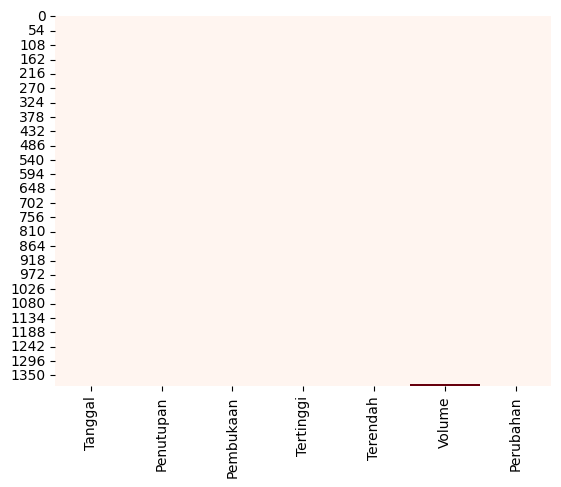

In [9]:
sns.heatmap(df.isnull(),cmap = 'Reds',cbar = False);

In [10]:
df.isnull().sum()

,0
Tanggal,0
Penutupan,0
Pembukaan,0
Tertinggi,0
Terendah,0
Volume,5
Perubahan,0


Setelah kita cek, memang benar bahwa Kolom Vol. memiliki missing values sejumlah **5 data**. Missing value akan diperbaiki saat memasuki data preprocessing.

### Statistik Deskriptif

In [11]:
df.describe()

,Penutupan,Pembukaan,Tertinggi,Terendah
count,1390.000000,1390.000000,1390.000000,1390.000000
mean,3.721345,3.723511,3.763662,3.680288
std,0.490229,0.488343,0.487201,0.488153
min,2.560000,2.550000,2.590000,2.450000
25%,3.310000,3.302500,3.360000,3.260000
50%,3.800000,3.800000,3.840000,3.770000
75%,4.080000,4.070000,4.120000,4.030000
max,4.770000,4.850000,4.850000,4.720000


Tabel di atas menunjukkan statistik deskriptif untuk masing-masing kolom, antara lain: Penutupan, Pembukaan, Tertinggi, Terendah. Untuk kolom Volume dan Perubahan tidak diikut sertakan pada code ini karena dua kolom tersebut masih berupa object dan bukan float.

### Mengkonversi Tanggal

In [12]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)

df['Tanggal']

,Tanggal
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08
...,...
1385,2024-09-18
1386,2024-09-19
1387,2024-09-20
1388,2024-09-23


Dilakukan konversi tanggal untuk mengubah formatnya menjadi 'dd-mm-yyyy' agar memudahkan kita untuk mengambil informasinya.

### Mengekstrak Tahun Dari Kolom Tanggal

In [13]:
df['Tahun'] = df['Tanggal'].dt.year

df['Tahun']

,Tahun
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
1385,2024
1386,2024
1387,2024
1388,2024


Disini saya ambil data untuk tahun saja, agar nanti dapat kita buat visualisasi persebaran datanya, tahun ini nantinya akan dijadikan salah satu sumbunya.

### Visualisasi Jumlah Data Berdasarkan Tahun

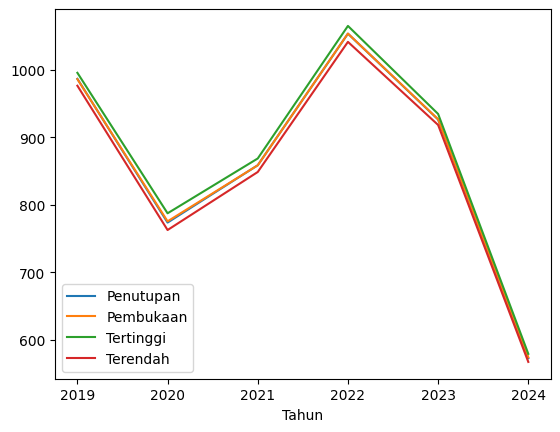

In [14]:
df_group_tahun = df.groupby('Tahun').sum(numeric_only=True)
df_numerik = df_group_tahun.select_dtypes(include='number')

df_numerik.plot()
plt.show()

Diagram di atas merupakan visualisasi dari banyaknya data berdasarkan tahun yang tersedia, dapat dilihat bahwa jumlah data tiap fiturnya pada awal tahun 2019 menuju tahun 2020 mengalami penurunan yang signifikan, kemudian pada awal tahun 2020 hingga tahun 2022 mengalami kenaikan yang cukup stabil, dan berlanjut pada awal tahun 2023 mengalami penurunan yang cukup drastis.

### Visualisasi Rata-Rata Data Berdasarkan Tahun

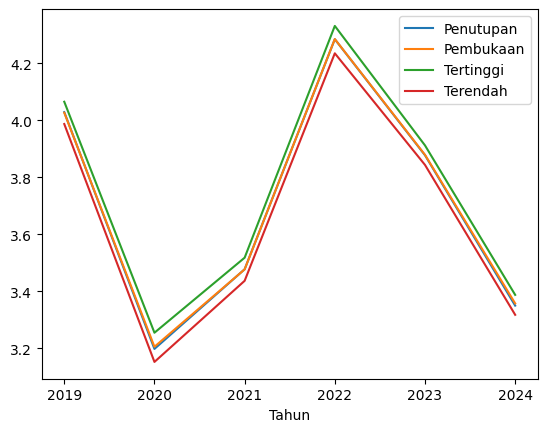

In [15]:
df_group_tahun = df.groupby('Tahun').mean(numeric_only=True)
df_numerik = df_group_tahun.select_dtypes(include='number')

df_numerik.plot()
plt.show()

Diagram tersebut memvisualisasikan rata-rata nilai dari fitur-fitur numerik (Penutupan, Pembukaan, Tertinggi, Terendah) pada dataset harga saham PT Telkom Indonesia Tbk (TLKM) untuk setiap tahunnya.

### Visualisasi Jumlah Volume Untuk Tiap Tahunnya

### Proses Konvert Kolom Vol. Menjadi Float



In [16]:
def convert_vol_to_float(vol):
  if isinstance(vol, (int, float)):
    return vol

  vol = vol.replace(',', '.')

  if 'M' in vol:
    return float(vol.replace('M', '')) * 1_000_000
  elif 'K' in vol:
    return float(vol.replace('K', '')) * 1_000
  elif 'B' in vol:
    return float(vol.replace('B', '')) * 1_000_000_000
  else:
    try:
      return float(vol)
    except ValueError:
      return vol

In [17]:
df['Volume'] = df['Volume'].apply(convert_vol_to_float)

Tujuan dari kode ini adalah untuk mengubah tipe data kolom 'Vol.' dari object menjadi float. Hal ini perlu dilakukan karena kolom 'Vol.' berisi informasi volume perdagangan saham yang penting untuk analisis dan pemodelan, tetapi masih mengandung karakter non-numerik (seperti "M" untuk juta dan "K" untuk ribu). Dengan mengubahnya menjadi float, kita dapat melakukan perhitungan matematika dan menggunakannya dalam algoritma machine learning.

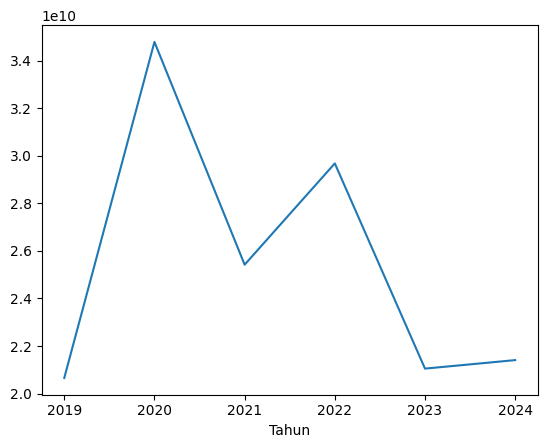

In [18]:
df_group_tahun = df.groupby('Tahun').sum(numeric_only=True)
df_group_tahun['Volume'].plot()

plt.show()

Visualisasi jumlah volume untuk tiap tahunnya, kolom volumen ini saya bedakan dikarenakan untuk memastikan bahwa setiap kolom diproses dengan benar sesuai dengan tipe data dan karakteristiknya, sehingga perhitungan dapat dilakukan dengan akurat dan menghindari error.

### Korelasi Koefisien


Korelasi Pearson adalah ukuran statistik yang digunakan untuk menentukan kekuatan dan arah hubungan linier antara dua variabel kontinu. Nilai koefisien korelasi Pearson (dilambangkan sebagai **r**) berkisar antara -1 hingga 1:

- **r = 1**: Hubungan linier positif sempurna. Ketika satu variabel meningkat, variabel lainnya meningkat secara proporsional.
- **r = -1**: Hubungan linier negatif sempurna. Ketika satu variabel meningkat, variabel lainnya menurun secara proporsional.
- **r = 0**: Tidak ada hubungan linier antara dua variabel.

Rumus untuk korelasi Pearson adalah:

$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$

Dimana:
- (X_i) dan (Y_i) adalah titik data individual dari dua variabel.
- $(\bar{X})$ dan $(\bar{Y})$ masing-masing adalah rata-rata dari variabel (X) dan (Y).

Sebelum melakukan visualisasi korelasi antar sesama fitur, perlu dilakukan kovert kolom perubahan yang tipe data awalnya adalah string dikarenakan terdapat '%' pada datanya lalu saya ubah menjadi float agar tidak terjadi error nantinya.

In [19]:
df['Perubahan'] = df['Perubahan'].str.replace(',', '.').str.rstrip('%').astype(float) / 100

df['Perubahan']

,Perubahan
0,-0.0053
1,0.0027
2,-0.0080
3,0.0162
4,0.0080
...,...
1385,0.0097
1386,0.0064
1387,0.0032
1388,0.0063


Di atas merupakan hasil dari konvert yang telah saya lakukan yaitu dengan menghilangkan symbol '%' namun tidak mengubah inti dari isi datanya.

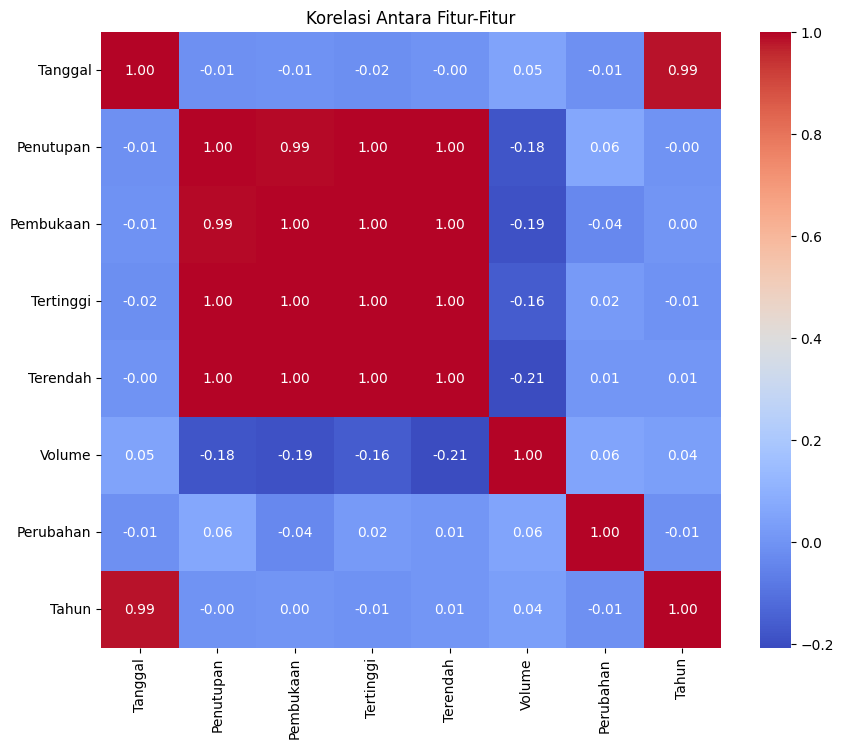

In [20]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antara Fitur-Fitur')
plt.show()

Dari hasil visualisasi korelasi fitur-fitur di atas, saya mendapatkan kesimpulan antara lain:

1. Korelasi Positif Kuat: Terdapat korelasi positif yang kuat antara fitur-fiturnya, yaitu 'Penutupan', 'Pembukaan', 'Tertinggi', dan 'Terendah'. Hal ini menunjukkan bahwa ketika salah satu fitur harga naik, fitur harga lainnya cenderung naik juga. Korelasi yang kuat ini logis karena fitur-fitur ini saling terkait dalam pergerakan harga saham harian.

2. Korelasi Lemah: 'Volume' dan 'Perubahan' memiliki korelasi yang relatif lemah dengan fitur-fitur lainnya. Artinya, perubahan volume perdagangan atau persentase perubahan harga tidak memiliki pengaruh yang signifikan terhadap harga saham secara langsung.

3. Korelasi Negatif: 'Tahun' menunjukkan korelasi negatif yang lemah dengan beberapa fitur. Ini bisa menunjukkan adanya tren penurunan harga saham dalam rentang waktu yang diwakili oleh data (2019-2024), meskipun korelasinya tidak terlalu kuat.

Secara umum, visualisasi korelasi menunjukkan bahwa fitur-fitur (Penutupan, Pembukaan, Tertinggi, Terendah) memiliki hubungan yang erat, sedangkan Volume dan Perubahan memiliki hubungan yang lebih independen dengan fitur-fitur lainnya. Oleh karena itu, pada proses selanjutnya akan dilakukan penghapusan Kolom Perubahan dan Kolom Volume karena tidak akan terlalu berguna.

# Data Preprocessing

## Imputasi Missing Value

### Menampilkan baris data yang memiliki missing value

In [22]:
missing_data = df[df.isna().any(axis=1)]

missing_data

,Tanggal,Penutupan,Pembukaan,Tertinggi,Terendah,Volume,Perubahan,Tahun
1384,2024-09-17,3.09,3.12,3.13,3.08,NaN,-0.0064,2024
1385,2024-09-18,3.12,3.12,3.13,3.10,NaN,0.0097,2024
1386,2024-09-19,3.14,3.14,3.15,3.12,NaN,0.0064,2024
1387,2024-09-20,3.15,3.15,3.17,3.12,NaN,0.0032,2024
1388,2024-09-23,3.17,3.15,3.18,3.13,NaN,0.0063,2024


Dapat dilihat bahwa pada index 1384-1388 pada kolom Vol. terdapat 5 data yang berstatus 'NaN'.

### Menampilkan kolom yang memiliki missing value

In [23]:
missing_columns = df.columns[df.isna().any()].tolist()

missing_columns

['Volume']

Kita pastikan kolom mana yang memeiliki missing values, dan hasilnya adalah Kolom Vol. saja yang terdapat missing value.

###  Menampilkan total missing value per kolom

In [24]:
missing_count = df.isna().sum()

missing_count

,0
Tanggal,0
Penutupan,0
Pembukaan,0
Tertinggi,0
Terendah,0
Volume,5
Perubahan,0
Tahun,0


Total missing values pada Kolom Vol. berjumlah 5 data.

### Menampilkan persentase missing value per kolom

In [25]:
missing_percentage = df.isna().mean() * 100

missing_percentage

,0
Tanggal,0.000000
Penutupan,0.000000
Pembukaan,0.000000
Tertinggi,0.000000
Terendah,0.000000
Volume,0.359712
Perubahan,0.000000
Tahun,0.000000


Presentasi missing values pada Kolom Vol. hanya sebesar **0.359712**, sehingga saya memutuskan untuk menangani missing values dengan menggunakan *Litwise Deletion* yaitu metode dalam statistik untuk menangani data yang hilang dengan cara menghapus seluruh catatan yang mengandung nilai yang hilang. Sehingga saya akan **menghapus data pada index 1384-1388**.

### Litwise Deletion

**Listwise Deletion** (atau *complete-case analysis*) adalah metode menangani data yang hilang (*missing data*) dengan cara menghapus seluruh baris yang memiliki setidaknya satu nilai hilang.

### Rumus Dasar:
Misalkan:
- Dataset awal memiliki (n) observasi ((n) baris) dan (p) fitur ((p) kolom).
- Dataset dilambangkan dengan matriks $( X \in \mathbb{R}^{n \times p} )$.
- $( X_{i,j} )$ merepresentasikan elemen pada baris ke-(i) dan kolom ke-(j).

**Definisi**:
- $( M_i = \{j \,|\, X_{i,j} \text{ kosong (missing)}\} )$ adalah himpunan indeks fitur dengan nilai hilang pada baris ke-(i).
- Baris (i) akan dihapus jika $( |M_i| > 0 )$ (ada elemen hilang).

**Operasi Listwise Deletion**:

Dataset hasil ( X' ) didefinisikan sebagai:


$[
X' = \{X_i \,|\, M_i = \emptyset\}, \quad X' \in \mathbb{R}^{m \times p}
$]


- ( m ): Jumlah baris setelah penghapusan, $( m \leq n )$.
- $( M_i = \emptyset )$: Tidak ada elemen hilang di baris ke-(i).

### Intuisi:
1. **Sebelum Listwise Deletion**:
   Dataset lengkap memiliki ( n ) baris, tetapi beberapa baris memiliki nilai hilang.

2. **Setelah Listwise Deletion**:
   Hanya baris yang memiliki data lengkap (tidak ada nilai hilang) yang dipertahankan.

Listwise Deletion cocok untuk dataset dengan sedikit nilai hilang, tetapi kurang ideal jika persentase data yang hilang tinggi.

### Menghapus baris yang memiliki missing value

In [26]:
df.dropna(subset=['Volume'],how='any',inplace=True)
df['Volume'].isnull().sum()

df['Volume']

,Volume
0,31360000.0
1,83840000.0
2,73940000.0
3,83680000.0
4,67960000.0
...,...
1380,46440000.0
1381,62900000.0
1382,85790000.0
1383,125030000.0


In [27]:
missing_count = df.isna().sum()

missing_count

,0
Tanggal,0
Penutupan,0
Pembukaan,0
Tertinggi,0
Terendah,0
Volume,0
Perubahan,0
Tahun,0


Namun, sesuai dengan hasil dari korelasi, kolom volume tidak akan digunakan sehingga untuk langkah ini hanya digunakan untuk menunjukkan cara untuk menghadapi missing value.

## Cek Data yang ganda

In [28]:
duplicated_count = df.duplicated().sum()

duplicated_count

0

## Definisi Kolom

In [29]:
df['Tanggal'] = df['Tanggal'].astype(np.int64)

Saya mengubah type dari kolom tanggal menjadi integer, dikarenakan pada beberapa skenario yang saya coba dapat menyebabkan error karena dataframe yang memiliki kolom berjenis timestamp tidak dapat diproses dengann baik.

Langkah selanjutnya yaitu dengan mendefenisikan kolom, pada skenario di bawah akan digunakan 4 kolom, 3 sebagai kolom inputnya input (x) dan 1 sebagai parameter yang akan digunakan untuk memprediksi.

In [30]:
x_1 = df['Pembukaan']
x_2 = df['Tertinggi']
x_3 = df['Terendah']
y = df['Penutupan']

x_1 = x_1.values
x_2 = x_2.values
x_3 = x_3.values
y = y.values

In [31]:
# convert to [rows, columns] structure
x_1 = x_1.reshape((len(x_1), 1))
x_2 = x_2.reshape((len(x_2), 1))
x_3 = x_3.reshape((len(x_3), 1))
y = y.reshape((len(y), 1))

print ("x_1.shape" , x_1.shape)
print ("x_2.shape" , x_2.shape)
print ("x_3.shape" , x_3.shape)
print ("y.shape" , y.shape)

x_1.shape (1385, 1)
x_2.shape (1385, 1)
x_3.shape (1385, 1)
y.shape (1385, 1)


Dalam praktik umum, data biasanya diproses terlebih dahulu sebelum dibagi menjadi set pelatihan dan pengujian. Di sini, kita perlu melakukan transformasi data dengan menormalisasi setiap data variabel menggunakan MinMaxScaler. Langkah-langkahnya adalah sebagai berikut:

1. membentuk ulang setiap variabel menjadi array 2D dengan konfigurasi :(jumlah data, 1) untuk penskalaan.
2. Tentukan Scaler yang berkisar dari 0 hingga 1 dan sesuaikan setiap variabel data secara individual. Yang perlu diperhatikan : fungsi fit_transform() terdiri dari fungsi fit() dan transform(), yang memindai nilai maks dan min data dan mengubahnya antara 0 dan 1. Jika data memiliki rentang yang berbeda, transformasinya akan berbeda. Untuk info lebih lanjut: MinMaxScaler()
3. Tumpuk semua variabel secara horizontal.

## Scale Fitur Data

### Rumus MinMaxScaler

Rumus **MinMaxScaler** adalah sebagai berikut:

$
[
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
]
$

Dimana:
- ( X ) adalah nilai data asli.
- $( X_{\text{min}} )$ adalah nilai minimum dari dataset.
- $( X_{\text{max}} )$ adalah nilai maksimum dari dataset.
- $( X_{\text{scaled}} $) adalah hasil normalisasi dengan rentang antara 0 dan 1.

Jika ingin mengubah rentang menjadi \([a, b]\), maka rumusnya:

$[
X_{\text{scaled}} = a + \frac{(X - X_{\text{min}})(b - a)}{X_{\text{max}} - X_{\text{min}}}
]$

Dimana:
- ( a ) adalah batas bawah rentang yang diinginkan.
- ( b ) adalah batas atas rentang yang diinginkan.

Rumus ini digunakan untuk memastikan data berada dalam rentang tertentu, biasanya untuk meningkatkan performa algoritma pembelajaran mesin yang sensitif terhadap skala fitur.

In [32]:
# normalization features
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
x_3_scaled = scaler.fit_transform(x_3)
y_scaled = scaler.fit_transform(y)

# horizontally stack columns
dataset_stacked = hstack((x_1_scaled, x_2_scaled, x_3_scaled, y_scaled))

print ("dataset_stacked.shape" , dataset_stacked.shape)

dataset_stacked.shape (1385, 4)


## Splitting Dataset

Kita ingin model kita belajar dengan menghubungkan data [x1,x2,x3] sebelumnya dengan data [y] mendatang. Oleh karena itu, kita perlu mengatur ulang data kita dengan menggunakan fungsi split sequences() yang dibuat oleh MachineLearningMastery. Ada 2 argumen utama yang perlu kita tentukan yaitu:
1. n_steps_in: Tentukan berapa banyak data yang ingin kita lihat kembali untuk prediksi
2. n_step_out: Tentukan berapa banyak data multi-langkah yang ingin kita perkirakan

### Rumus

Secara matematis, fungsi `split_sequences()` dapat dijelaskan dengan rumus berikut:

### Diberikan:
- $( S = \{s_1, s_2, s_3, \dots, s_T\} )$ adalah dataset sekuensial dengan ( T ) baris dan ( F ) fitur (multivariate) yang direpresentasikan sebagai matriks $( S \in \mathbb{R}^{T \times F} )$.
- $( n_{\text{steps}} ) $: panjang window (jumlah langkah untuk input sequence).

### Proses:
1. **Input (X)**:
   Untuk setiap ( i ) dalam range $( 1 \leq i \leq T - n_{\text{steps}} )$:
   - Ambil subset data dari baris ( i ) hingga $( i + n_{\text{steps}} - 1 )$ untuk semua fitur ( f ).
   - Representasi matematis:

     $[
     X_i = \{S[i], S[i+1], \dots, S[i + n_{\text{steps}} - 1]\}, \quad X \in \mathbb{R}^{n_{\text{steps}} \times F}.
     ]$

2. **Output (y)**:
   - Pilih target ( y_i ) dari baris $( i + n_{\text{steps}} )$ pada fitur target tertentu (misalnya, fitur terakhir ( f_F )).
   - Representasi matematis:

     $[
     y_i = S[i + n_{\text{steps}} - 1, F].
     ]$

3. **Hasil Akhir**:
   - Setelah iterasi selesai, output adalah:

     $[
     X = \{X_1, X_2, \dots, X_N\}, \quad y = \{y_1, y_2, \dots, y_N\},
     $]
     dengan $( N = T - n_{\text{steps}} )$.

### Intuisi:
- Input ( X ) adalah window berisi $( n_{\text{steps}} )$ langkah sebelumnya dari setiap fitur.
- Output ( y ) adalah nilai target pada langkah berikutnya.


In [33]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [35]:
# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 60 , 30

# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)

print ("X.shape" , X.shape)
print ("y.shape" , y.shape)

X.shape (1297, 60, 3)
y.shape (1297, 30)


In [37]:
split_percentage = 0.8  # Use 80% of data for training
split = int(len(df) * split_percentage)
train_X , train_y = X[:split, :] , y[:split, :]
test_X , test_y = X[split:, :] , y[split:, :]

n_features = train_X.shape[2]

In [39]:
print ("train_X.shape" , train_X.shape)
print ("train_y.shape" , train_y.shape)
print ("test_X.shape" , test_X.shape)
print ("test_y.shape" , test_y.shape)
print ("n_features" , n_features)

train_X.shape (1108, 60, 3)
train_y.shape (1108, 30)
test_X.shape (189, 60, 3)
test_y.shape (189, 30)
n_features 3


# Modeling

## Menggunakan LSTM

Di sini, kita akan mulai mengatur arsitektur model LSTM dengan menginisialisasi laju pembelajaran pengoptimal serta jumlah lapisan dalam jaringan. Jaringan saraf terdiri dari: 2 simpul LSTM dengan 50 unit tersembunyi, lapisan padat yang menentukan keluaran model berdasarkan n_steps_out (berapa banyak data masa depan yang ingin kita perkirakan) dan diakhiri dengan fungsi aktivasi.

### **LSTM (Long Short-Term Memory)**

adalah jenis unit dalam jaringan neural rekursif (RNN) yang dirancang untuk mengatasi masalah *vanishing gradient* dengan menggunakan struktur internal seperti *gates*. Berikut adalah rumus matematis untuk LSTM:

### Komponen Utama:
1. **Input Gate ((i_t))**: Mengontrol informasi baru yang masuk ke sel memori.
2. **Forget Gate ((f_t))**: Mengontrol informasi lama yang harus dilupakan dari sel memori.
3. **Cell State ((C_t))**: Menyimpan informasi yang relevan untuk waktu yang lama.
4. **Output Gate ((o_t))**: Mengontrol informasi yang keluar untuk prediksi.
5. **Hidden State ((h_t))**: Output utama untuk waktu (t).

---

### Rumus LSTM:
#### 1. Forget Gate ((f_t)):
$[
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
]$
- $(W_f$): Bobot forget gate.
- $(b_f$): Bias forget gate.
- $([h_{t-1}, x_t])$: Kombinasi hidden state sebelumnya dan input saat ini.
- $(\sigma)$: Fungsi sigmoid (untuk menghasilkan nilai antara 0 dan 1).

#### 2. Input Gate ((i_t)) dan Candidate Cell State $((\tilde{C}_t))$:
$[
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
]$
$[
\tilde{C}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)
]$
- (W_i, W_c): Bobot untuk input gate dan candidate cell state.
- (b_i, b_c): Bias masing-masing.
- $(\tanh)$: Fungsi aktivasi tanh (menghasilkan nilai antara -1 dan 1).

#### 3. Cell State ((C_t)):
$[
C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
]$
- $(\odot)$: Operasi perkalian elemen-wise (Hadamard product).
- $(C_{t-1})$: Cell state sebelumnya.

#### 4. Output Gate (\(o_t\)):
$[
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
]$
- $(W_o, b_o)$: Bobot dan bias output gate.

#### 5. Hidden State (\(h_t\)):
$[
h_t = o_t \odot \tanh(C_t)
]$

---

### Penjelasan:
1. **Forget Gate ((f_t))**: Menentukan bagian dari cell state lama $((C_{t-1}))$ yang akan dilupakan.
2. **Input Gate ((i_t))**: Memutuskan informasi baru $((\tilde{C}_t))$ yang akan ditambahkan ke cell state.
3. **Cell State ((C_t))**: Memadukan informasi lama dan baru untuk menghasilkan cell state saat ini.
4. **Output Gate ((o_t))**: Mengontrol informasi dalam hidden state ((h_t)) yang digunakan untuk prediksi.

### Diagram Aliran LSTM:
- **Input**: (x_t) dan $(h_{t-1})$.
- **Output**: (h_t) dan (C_t).
- **Gates**:
  - Forget Gate: Membatasi informasi lama.
  - Input Gate: Menambahkan informasi baru.
  - Output Gate: Menentukan bagian dari cell state yang diproses menjadi hidden state.

LSTM dirancang untuk belajar menangani informasi jangka panjang sambil secara dinamis memutuskan apa yang harus diingat dan dilupakan pada setiap langkah waktu.

In [40]:
#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.01)

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, X.shape[2]))) # Use X.shape[2] directly
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Catatan: Input_shape dari node LSTM pertama menentukan bentuk data input untuk prediksi dalam fase evaluasi. Sementara itu, Dense Layer menentukan bentuk output model berdasarkan n_steps_out

Dalam pelatihan, kita memiliki 32 kelompok dataset, oleh karena itu langkah_per_epoch akan menjadi 32.

Namun secara umum langkah_per_epoch dihitung dengan membagi jumlah total data training (len(train_X)) dengan ukuran batch (batch_size).

```
batch_size = 32  gunakan
   steps_per_epoch = len(train_X) // batch_size
```

Dalam setiap langkah, akan dibutuhkan 1385 titik data (1 kelompok) untuk pelatihan. Dengan 32 langkah per epoch, semua 32 kelompok akan dilatih dalam setiap epoch. Dengan 80 epoch, setiap kelompok akan dilatih 80 kali.

Epoch merepresentasikan berapa kali seluruh dataset training telah diproses oleh model selama proses training. Menentukan jumlah epoch yang tepat sangat penting karena:

* Epoch terlalu sedikit: Model mungkin underfit, artinya belum belajar pola data dengan baik dan performanya buruk.
* Epoch terlalu banyak: Model mungkin overfit, artinya terlalu fokus pada data training dan performanya buruk pada data baru (unseen data).

Seluruh kemajuan pelatihan seharusnya kurang dari 15 menit dengan Google Colab.

In [41]:
# Reshape input data to 3D for LSTM
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], train_X.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], test_X.shape[2]))

# Fit network
history = model.fit(
    train_X,
    train_y,
    epochs=80,
    steps_per_epoch=25,
    verbose=1,
    validation_data=(test_X, test_y),
    shuffle=False,
)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 18.6496 - mse: 18.6496 - val_loss: 0.1086 - val_mse: 0.1086
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.1086 - val_mse: 0.1086
Epoch 3/80
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.2095 - mse: 0.2095

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.2048 - mse: 0.2048 - val_loss: 0.1059 - val_mse: 0.1059
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.1059 - val_mse: 0.1059
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.2603 - mse: 0.2603 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1763 - mse: 0.1763 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 9/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 10/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 11/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms

# Evaluasi

Selanjutnya, kita akan menggunakan fungsi prep_data untuk menyiapkan data uji dan memasukkannya ke dalam model terlatih kita untuk meramalkan 30 data berikutnya. Selain itu, fungsi ini juga menyiapkan data masa lalu untuk keperluan plotting serta groundtruth untuk validasi. Argumen — start , end dan last akan dimaksudkan oleh —

mulai, akhir: Untuk menentukan rentang Data Uji berdasarkan n_steps_in . dapat berupa titik mana pun dalam kumpulan data uji.
terakhir : data terakhir dari nilai prediksi berdasarkan n_step_out .
Untuk menggunakan fungsi ini, cukup masukkan x1_test_scaled , x2_test_scaled, y_test dan tentukan argumen awal . Akhir & akhir akan dihitung secara otomatis.

In [42]:
# definisi data
x1_test = df['Pembukaan'].values
x2_test =  df['Tertinggi'].values
x3_test =  df['Terendah'].values
y_test = df['Penutupan'].values # no need to scale

# convert to [rows, columns] structure
x1_test = x1_test.reshape((len(x1_test), 1))
x2_test = x2_test.reshape((len(x2_test), 1))
x3_test = x3_test.reshape((len(x3_test), 1))
y_test = y_test.reshape((len(y_test), 1))

x1_test_scaled = scaler.fit_transform(x1_test)
x2_test_scaled = scaler.fit_transform(x2_test)
x3_test_scaled = scaler.fit_transform(x3_test)

Selanjutnya, kita akan mengevaluasi hasil prakiraan dengan metrik MAE dan RMSE dengan menggunakan fungsi evaluate_prediction . Cukup masukkan hasil prakiraan dan groundtruth dari fungsi prep_data .

In [43]:
def prep_data(x1_test_scaled , x2_test_scaled , x3_test_scaled, y_test , start , end , last):
    #prepare test data X
    dataset_test = hstack((x1_test_scaled, x2_test_scaled, x3_test_scaled))
    dataset_test_X = dataset_test[start:end, :]
    test_X_new = dataset_test_X.reshape(1, dataset_test_X.shape[0] , dataset_test_X.shape[1])

    #prepare past and groundtruth
    past_data = y_test[:end , :]
    dataset_test_y = y_test[end:last , :]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y)

    # predictions
    y_pred = model.predict(test_X_new)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)
    y_pred_inv = y_pred_inv[:,0]

    return y_pred_inv , dataset_test_y , past_data

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print("Test Data from {} to {}".format(start, end))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('Root Mean Square Error: {:.2f}'.format(rmse))
    print('')
    print('')

# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):

    plt.figure(figsize=(20, 4))

    y_mean = mean(prediction1)

    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')

    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

Terakhir, kita akan memplot grafik dengan menggunakan fungsi plot_multistep . Cukup masukkan past_data, hasil perkiraan, dan groundtruth.

In [44]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    plt.figure(figsize=(20, 4))
    y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

Untuk setiap kumpulan data uji, 120 hingga 180 dan 180 hingga 240 akan menjadi data pengujian yang akan dimasukkan ke dalam model yang dilatih.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Test Data from 120 to 180
Mean Absolute Error: 0.11
Root Mean Square Error: 0.12


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test Data from 180 to 240
Mean Absolute Error: 0.07
Root Mean Square Error: 0.09




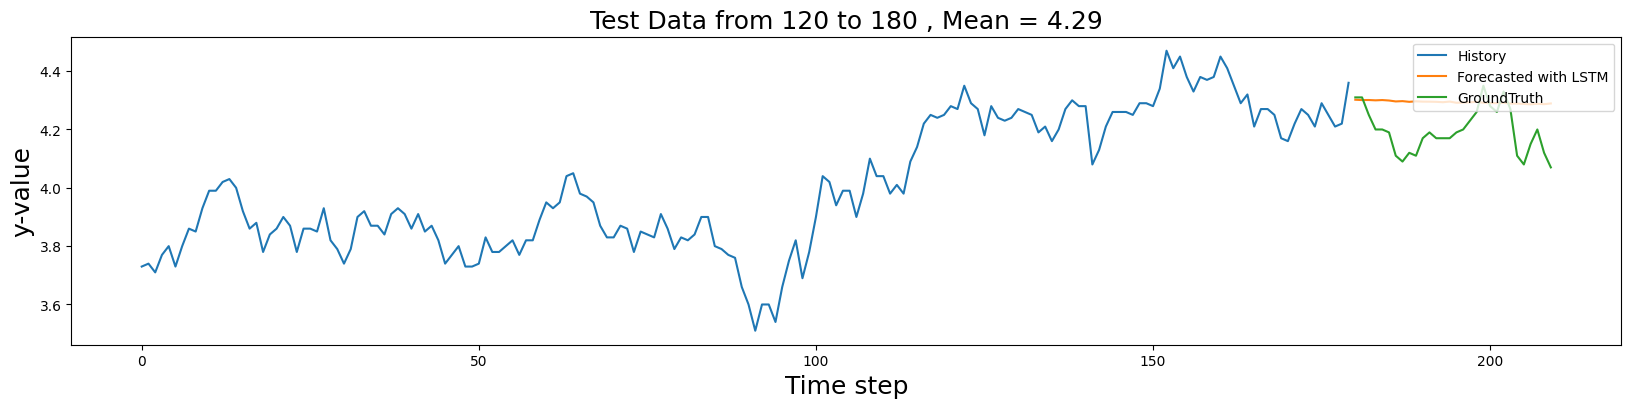

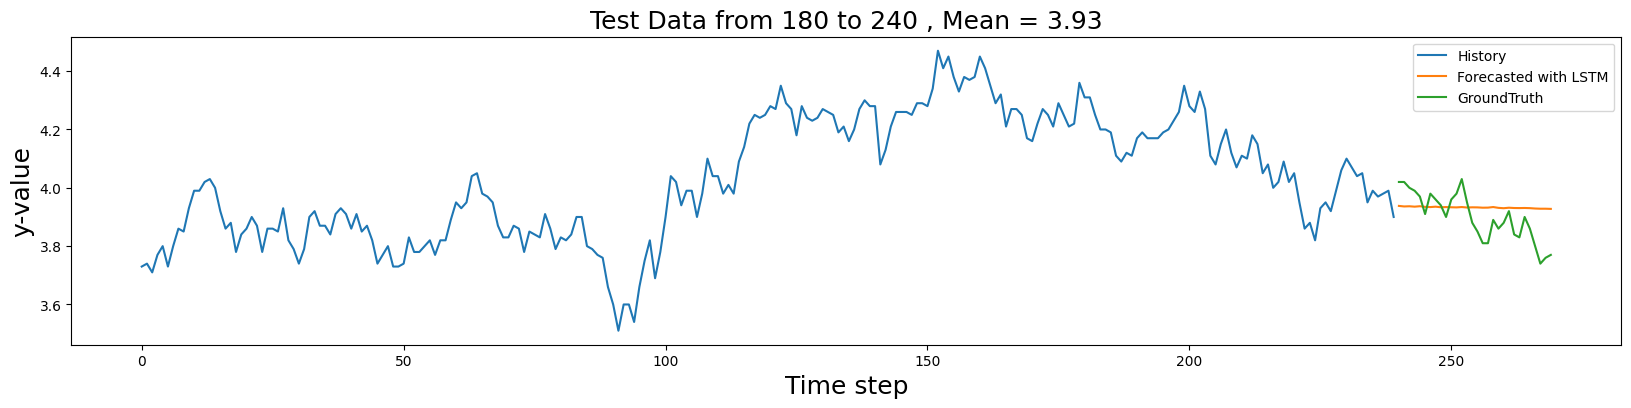

In [45]:
for i in range(120,240,60):
    start = i
    end = start + n_steps_in
    last = end + n_steps_out
    y_pred_inv , dataset_test_y , past_data = prep_data(x1_test_scaled , x2_test_scaled, x3_test_scaled , y_test , start , end , last)
    evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end)
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)


## Save & Load Model

Langkah selanjutnya adalah melakukan deployment menggunakan model terbaik, dari skenario yang saya lakukan model LSTM dengan menggunakan Multivariate dan Multi-Step ini memiliki nilai error yang paling sedikit, sehingga model ini akan saya simpan dan akan saya gunakan untuk deployment nantinya.

In [46]:
model_url = '/content/drive/MyDrive/PSD/model/lstm-multistep-multivariate.h5'
model.save(model_url)
print("Saved")

Saved


In [47]:
model_url = '/content/drive/MyDrive/PSD/model/lstm-multistep-multivariate.h5'
model = tf.keras.models.load_model(model_url, custom_objects={'mse': tf.keras.losses.MeanSquaredError()})
print("Loaded")
model.summary()

Loaded


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 30)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,532 (127.08 KB)

 Trainable params: 32,530 (127.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)